In [70]:
import numpy as np
import pandas as pd

In [71]:
#SelfcreatedData
ColumnNames=['Hours','Calories', 'Weight']
DataValues=[[  1.0,   2500,   95],
             [  2.0,   2000,   85],
             [  2.5,   1900,   83],
             [  3.0,   1850,   81],
             [  3.5,   1600,   80],
             [  4.0,   1500,   78],
             [  5.0,   1500,   77],
             [  5.5,   1600,   80],
             [  6.0,   1700,   75],
             [  6.5,   1500,   70]]

In [72]:
#converting self created data in dataframe
df=pd.DataFrame(data=DataValues, columns=ColumnNames)
df

,Hours,Calories,Weight
0,1.0,2500,95
1,2.0,2000,85
2,2.5,1900,83
3,3.0,1850,81
4,3.5,1600,80
5,4.0,1500,78
6,5.0,1500,77
7,5.5,1600,80
8,6.0,1700,75
9,6.5,1500,70


In [73]:
#Separate Target Variable and Predictor Variables
TargetVariable='Weight'
Predictors=['Hours','Calories']
X=df[Predictors].values
y=df[TargetVariable].values

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
X_train.shape, X_test.shape

((8, 2), (2, 2))

In [76]:
from xgboost import XGBRegressor
regressormodel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')  #object for xgboost regressor created

In [77]:
xgbr=regressormodel.fit(X_train, y_train)
predict=xgbr.predict(X_test)


In [78]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, xgbr.predict(X_train)))

R2 Value: 0.9999999183585404


In [79]:
print('Accuracy',100- (np.mean(np.abs((y_test - predict) / y_test)) * 100))

Accuracy 90.7867270076976


<Axes: >

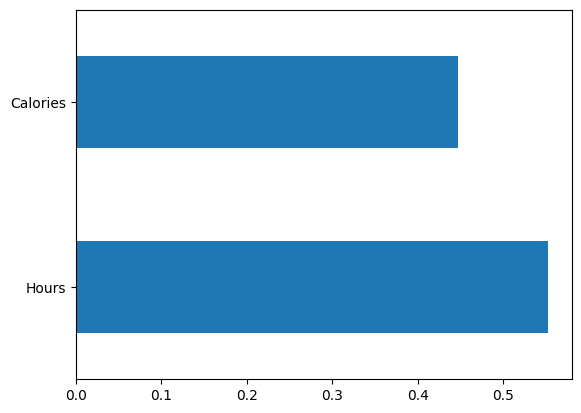

In [80]:
%matplotlib inline
feature_importances=pd.Series(xgbr.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [81]:
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=predict
TestingDataResults.head()

,Hours,Calories,Weight,PredictedWeight
0,6.0,1700.0,75,79.997498
1,2.0,2000.0,85,94.998734
